In [9]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)',"petal width (cm)"]].values
Y = (iris.target == 2)

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C = 1,random_state=42))
svm_clf.fit(X,Y)

c:\Users\jitik\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [3]:
X_new = [[5.5,1.7],[5.0,1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [5]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

In [7]:
np.random.seed(100)

In [18]:
m = 100
x = 6 * np.random.randn(m,1) - 3
y = 0.5 * x ** 2 + x + 2 + np.random.randn(m,1)

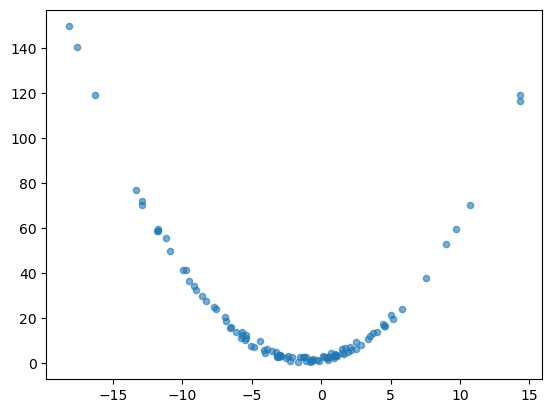

In [27]:
plt.scatter(x,y,s = 20,alpha=0.6)

In [28]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_,lin_reg.coef_

(array([18.47742339]), array([[-1.47646833]]))

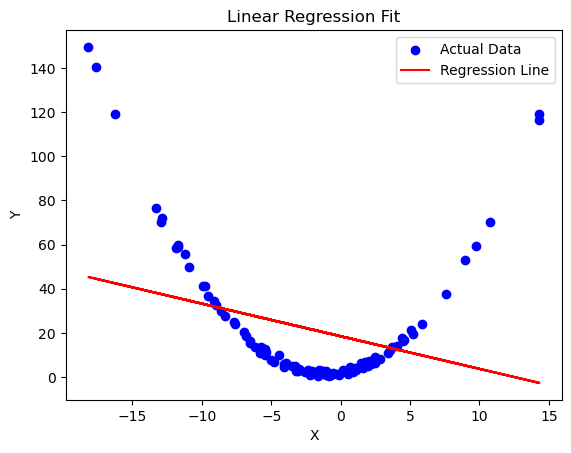

In [29]:
# Predict values
y_pred = lin_reg.predict(x)

# Plot
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression Fit')
plt.show()

In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2,include_bias=False)
x_poly = poly_features.fit_transform(x)

In [32]:
x_poly[0]

array([1.53826133, 2.36624791])

In [33]:
lin_reg.fit(x_poly,y)

LinearRegression()

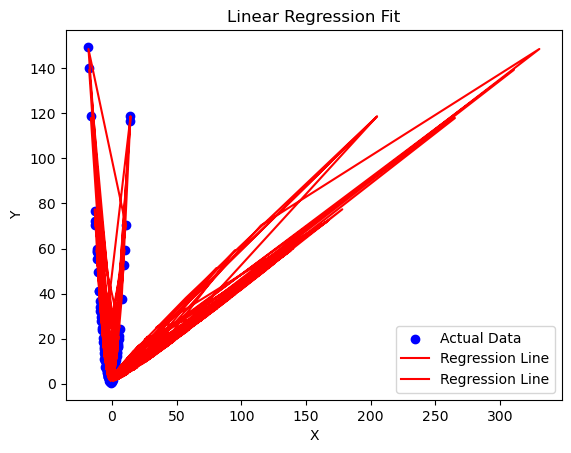

In [36]:
# Predict values
y_pred = lin_reg.predict(x_poly)

# Plot
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x_poly, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression Fit')
plt.show()

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

x,y = make_moons(n_samples=100,noise = 0.15,random_state=42)
polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree = 3),
    StandardScaler(),
    LinearSVC(C = 10,max_iter=10_000,random_state=42)
)
polynomial_svm_clf.fit(x,y)

c:\Users\jitik\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

c:\Users\jitik\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


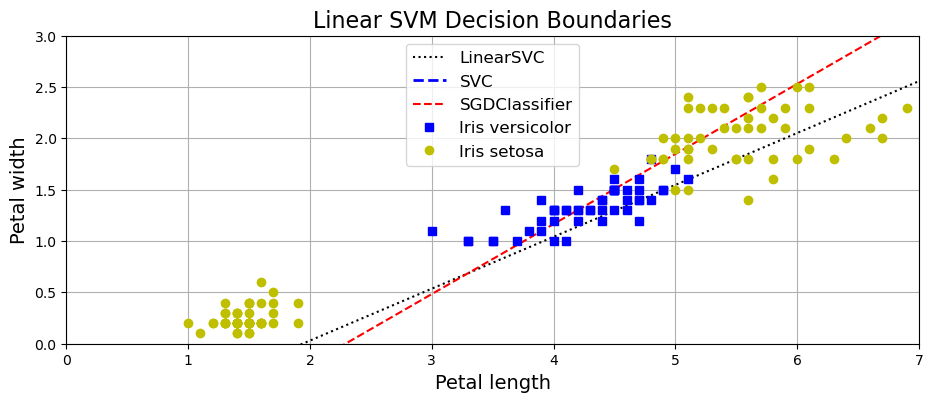

In [66]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
X = iris["data"][:, (2, 3)]  # petal length & petal width
y = (iris["target"] == 1).astype(int)  # 1 if versicolor, 0 otherwise


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# lin_svc = LinearSVC(loss='hinge', dual='auto', random_state=42)
# svm_clf = SVC(kernel='linear', random_state=42)
# sgd_clf = SGDClassifier(loss='hinge', random_state=42)

lin_svc = LinearSVC(random_state=42)
svm_clf = SVC(random_state=42,kernel='linear',C = 100)
sgd_clf = SGDClassifier(random_state=42)

lin_svc.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

def compute_decision_boundary(model):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    line_scaled = np.array([[-10, -10 * w + b], [10, 10 * w + b]])
    return scaler.inverse_transform(line_scaled)

lin_line = compute_decision_boundary(lin_svc)
svc_line = compute_decision_boundary(svm_clf)
sgd_line = compute_decision_boundary(sgd_clf)

# Plotting
plt.figure(figsize=(11, 4))
plt.plot(lin_line[:, 0], lin_line[:, 1], "k:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r--", label="SGDClassifier")
plt.plot(X[y==1][:, 0], X[y==1][:, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0][:, 0], X[y==0][:, 1], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=12)
plt.axis([0, 7, 0, 3])
plt.grid(True)
plt.title("Linear SVM Decision Boundaries", fontsize=16)
plt.show()


In [67]:
svc_line

array([[-13.83604066, -68.62142435],
       [ 21.35204066, -51.43469982]])

In [68]:
sgd_line

array([[-13.83604066, -11.00113048],
       [ 21.35204066,  13.00213809]])

In [69]:
lin_line

array([[-13.83604066,  -7.97151332],
       [ 21.35204066,   9.80943003]])

(0.0, 7.0, 0.0, 3.0)

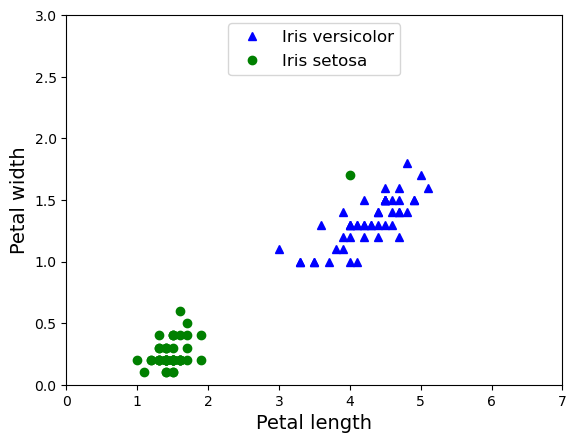

In [85]:
from sklearn import datasets
iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

plt.plot(X[y==1][:, 0], X[y==1][:, 1], "b^", label="Iris versicolor")
plt.plot(X[y==0][:, 0], X[y==0][:, 1], "go", label="Iris setosa")
plt.plot(4,1.7,'go')
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=12)
plt.axis([0, 7, 0, 3])

In [76]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3